<a href="https://colab.research.google.com/github/itzaamer/Hindi-Character-recognition/blob/main/Hindi_Character_Recogitions_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3> Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_path ='/content/drive/MyDrive/case study -2'

In [ ]:
!pip3 install pyunpack
from pyunpack import Archive
import os

In [ ]:
Archive("/content/drive/MyDrive/case study -2/archive.zip").extractall('/content/drive/MyDrive/case study -2')

In [ ]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import listdir
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
train_path = "/content/drive/MyDrive/case study -2/DevanagariHandwrittenCharacterDataset/Train"

In [ ]:
classes = os.listdir(train_path)
print(len(classes))
classes

46


['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

<h2> Class Distribution:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


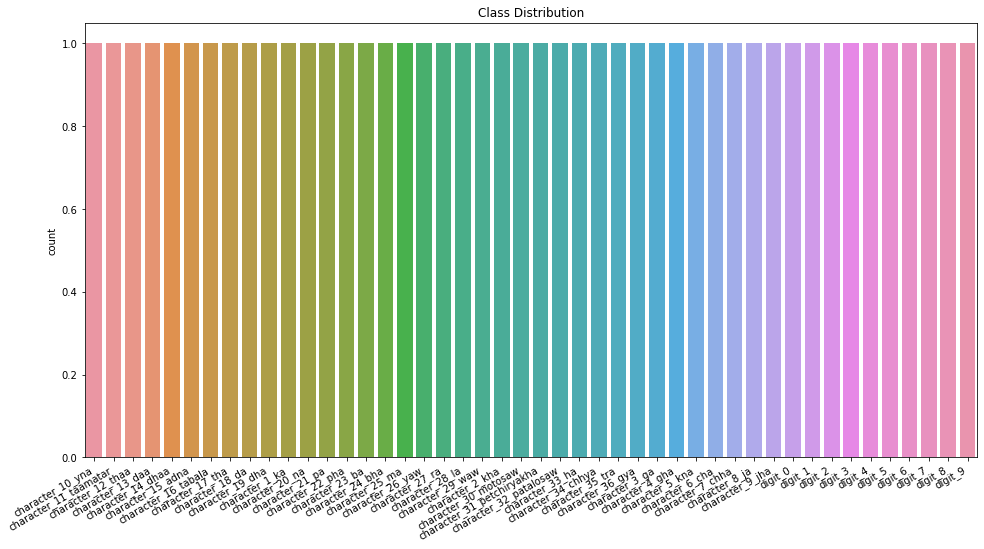

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Class Distribution')
sns.countplot(classes).set_xticklabels(labels=classes,rotation=30, ha='right')
plt.show()

<h3>Observation:

- By looking above count plot we see that every class have the same count.
- So that's means we have the balanced dataset.

In [ ]:
# a function to resize the image into appropriate dimensions
def resize(img):
    img = cv2.resize(img,(32,32))
    return img

In [ ]:
X_train = []
y_train = []

# to get the name of the folder
for name_folder in os.listdir(train_path) :

    name = '/content/drive/MyDrive/case study -2/DevanagariHandwrittenCharacterDataset/Train/' + name_folder
    for f in listdir(name):
        # name of the folder is the name of the output or class label
        y_train.append(np.asarray(name_folder))
        
        # constructing full path to the image
        name = '/content/drive/MyDrive/case study -2/DevanagariHandwrittenCharacterDataset/Train/' + name_folder + '/' + f
        
        # reading the image
        image = cv2.imread(name,0)/255
        
        # appending to form the image list
        image = np.asarray(image)
        image = resize(image)
        X_train.append([image])

In [ ]:
# converting the lsit into an numoy array so that it can be fed into neural network
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
X_train = np.reshape(X_train, [-1,32,32,1])

In [ ]:
X_train.shape

(78200, 32, 32, 1)

In [ ]:
y_train.shape

(78200,)

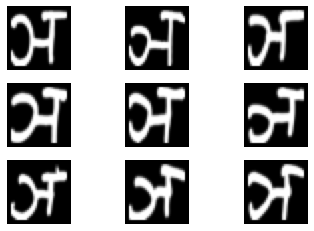

In [ ]:
for i in range(1, 10):    
    plt.subplot(330  + i)
    plt.axis('off')
    plt.imshow(X_train[i-1].reshape(32, 32), cmap='gray')
plt.show()

In [ ]:
# one hot encoding the output labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y_train = onehot_encoder.fit_transform(integer_encoded)

In [ ]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# splitting the samples into training and testing sets so that we cross validate our results
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train ,test_size = .2)

In [ ]:
y_train.shape

(62560, 46)

In [ ]:
y_test.shape

(15640, 46)

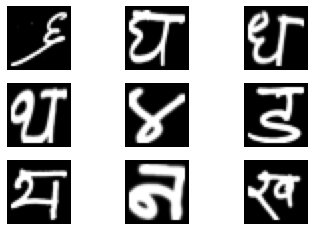

In [ ]:
for i in range(1, 10):    
    plt.subplot(330  + i)
    plt.axis('off')
    plt.imshow(X_train[i-1].reshape(32, 32), cmap='gray')
plt.show()

In [ ]:
##Getting size of images
list_of_heights = []
list_of_widths = []
for i in os.listdir(train_path):
    for image in os.listdir(os.path.join(train_path,i)):
        img = cv2.imread(os.path.join(os.path.join(train_path,i),image), cv2.IMREAD_UNCHANGED)
        # get dimensions of image
        shape = img.shape
        list_of_heights.append(shape[0])
        list_of_widths.append(shape[1])     

Text(0.5, 1.0, 'heights')

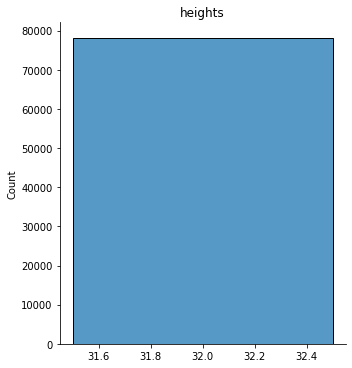

In [ ]:
##plotting 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.displot(list_of_heights)
plt.title('heights')

Text(0.5, 1.0, 'widths')

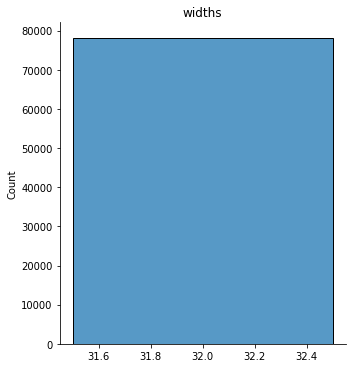

In [ ]:
sns.displot(list_of_widths)
plt.title('widths')

In [ ]:
np.median(list_of_heights)

32.0

In [ ]:
np.mean(list_of_heights)

32.0

In [ ]:
np.median(list_of_widths)

32.0

In [ ]:
np.mean(list_of_widths)

32.0

In [ ]:
import pickle
pickle.dump(X_train, open("/content/drive/MyDrive/case study -2/X_train.pickle", 'wb'))
pickle.dump(X_test, open("/content/drive/MyDrive/case study -2/X_test.pickle", 'wb'))
pickle.dump(y_train, open("/content/drive/MyDrive/case study -2/y_train.pickle", 'wb'))
pickle.dump(y_test, open("/content/drive/MyDrive/case study -2/y_test.pickle", 'wb'))